In [1]:
from __future__ import print_function
import numpy as np
import warnings
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import os
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Input, Conv2D, MaxPooling2D, GlobalMaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import get_file
from tensorflow.keras import backend as K
from tensorflow.keras.applications.imagenet_utils import decode_predictions, preprocess_input
from tensorflow.keras.utils import get_source_inputs

In [2]:
def VGGupdated(input_tensor=None,classes=2):
    img_rows, img_cols = 224, 224
    img_channels = 3
    img_dim = (img_rows, img_cols, img_channels)
    img_input = Input(shape=img_dim)

    # Block 1
    x = Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv1')(img_input)
    x = Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv2')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block1_pool')(x)

    # Block 2
    x = Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv1')(x)
    x = Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv2')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block2_pool')(x)

    # Block 3
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv1')(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv2')(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv3')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block3_pool')(x)

    # Block 4
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv1')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv2')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv3')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block4_pool')(x)

    # Block 5
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv1')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv2')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv3')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block5_pool')(x)


    # Classification block
    x = Flatten(name='flatten')(x)
    x = Dense(4096, activation='relu', name='fc1')(x)
    x = Dense(4096, activation='relu', name='fc2')(x)
    x = Dense(classes, activation='softmax', name='predictions')(x)

    # Create model.
    model = Model(inputs = img_input, outputs = x, name='VGGdemo')
    return model

In [3]:
# model.summary()

In [4]:
model = VGGupdated(classes = 200)

In [5]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [21]:
train_dir = '/content/drive/MyDrive/CubDatset/train'
test_dir = '/content/drive/MyDrive/CubDatset/test'

In [7]:
import os

def count_images_in_folders(parent_directory_path):
    image_extensions = {'.jpg', '.jpeg', '.png', '.bmp', '.gif'}
    total_images = 0

    for root, dirs, files in os.walk(parent_directory_path):
        for file in files:
            if os.path.splitext(file)[1].lower() in image_extensions:
                total_images += 1

    return total_images

In [22]:
total_images_test = count_images_in_folders(test_dir)
print(f"Total number of Test_images: {total_images_test}")


Total number of Test_images: 200


In [23]:
total_images_train = count_images_in_folders(train_dir)
print(f"Total number of Train: {total_images_train}")

Total number of Train: 800


In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import preprocess_input

In [11]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range = 0.2,
    zoom_range = 0.2)

test_datagen = ImageDataGenerator(
    rescale=1./255,
  )

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),  # matching the input size of the model
    batch_size=32,
    class_mode='categorical')  # for multi-class classification

validation_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical')


Found 200 images belonging to 200 classes.
Found 200 images belonging to 200 classes.


In [12]:
history = model.fit(
    train_generator,
    epochs=1,
    validation_data=validation_generator,
    steps_per_epoch=len(train_generator),
    validation_steps=len(validation_generator))


7/7 [==============================] - 577s 92s/step - loss: 6.4352 - accuracy: 0.0000e+00 - val_loss: 5.2983 - val_accuracy: 0.0050


In [13]:
# # Path where you want to save the model
# model_path = '/content/drive/MyDrive/CubDatset/Models/model_at_1.h5'

# # Save the model
# model.save(model_path)

In [14]:
training_accuracy = history.history['accuracy'][-1]  # Last training accuracy
validation_accuracy = history.history['val_accuracy'][-1]  # Last validation accuracy
print(f"Training Accuracy: {training_accuracy}")
print(f"Validation Accuracy: {validation_accuracy}")

Training Accuracy: 0.0
Validation Accuracy: 0.004999999888241291


In [15]:
# from tensorflow.keras.models import load_model
# model_path = '/content/drive/MyDrive/CubDatset/Models/model_at_1.h5'

# # Load the model
# loaded_model = load_model(model_path)

Input image shape: (1, 224, 224, 3)


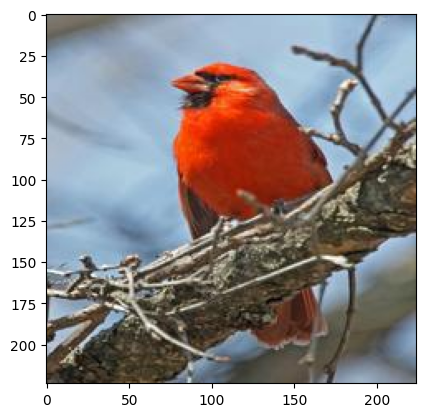

In [16]:
from matplotlib.pyplot import imread
from matplotlib.pyplot import imshow

img_path = '/content/drive/MyDrive/CubDatset/Test_cardinal_Images/Cardinal_0002_18424.jpg'

img = image.load_img(img_path, target_size=(224, 224))

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

print('Input image shape:', x.shape)

my_image = imread(img_path)
imshow(my_image)

In [17]:
print(model.predict(x))

1/1 [==============================] - 1s 778ms/step
[[0.00477902 0.00326169 0.0048362  0.00752486 0.00589947 0.0052677
  0.0036659  0.00075793 0.0083384  0.00336248 0.00388821 0.00411717
  0.00455373 0.00470934 0.00307954 0.00338994 0.00249904 0.00756337
  0.00428642 0.00433295 0.00334289 0.00510535 0.00426742 0.00374242
  0.00750014 0.00421922 0.00745245 0.00537861 0.00632825 0.00428798
  0.00336836 0.00281399 0.00362232 0.00817828 0.00380214 0.00341378
  0.0050438  0.00325137 0.00635914 0.00440437 0.00200268 0.00465281
  0.00510238 0.00488303 0.00571648 0.00400984 0.00426375 0.00278679
  0.009077   0.00331137 0.00408593 0.00341557 0.00534256 0.00583974
  0.00314371 0.00348136 0.00678214 0.0038996  0.00567612 0.00453112
  0.00313457 0.00778144 0.00549191 0.00633037 0.00393343 0.00505929
  0.00339223 0.00681993 0.0044135  0.0038396  0.00435952 0.00325259
  0.00477115 0.00514898 0.00409306 0.00421486 0.00405121 0.00354751
  0.00487811 0.00947468 0.00483046 0.00676889 0.00436581 0.00443

In [18]:
top_5_classes = np.argsort(model.predict(x)[0])[-5:]
print("Top 5 classes:", top_5_classes)

1/1 [==============================] - 1s 613ms/step
Top 5 classes: [ 48 133  79 165 143]
